<a href="https://colab.research.google.com/github/Aldistwn29/Experience_Perusahaan_Quantum/blob/main/ritel_quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Data Cleaning

In [2]:
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
df.shape

(264834, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [6]:
df.describe(include='object')

,DATE,PROD_NAME,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
count,264834,264834,264834,264834,264834
unique,364,114,21,7,3
top,2018-12-24,Kettle Mozzarella Basil & Pesto 175g,KETTLE,OLDER SINGLES/COUPLES,Mainstream
freq,939,3304,41288,54479,101988


# Cek Missing value dan Duplikat

In [7]:
missing_value = df.isnull().sum()
print(f"Jumalh Missing value:{missing_value}")

Jumalh Missing value:LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [8]:
duplicat = df.duplicated().sum()
print(f"Jumlah Duplicated:{duplicat}")

df = df.drop_duplicates()
print("Jumlah duplikat setelah dihapus:", df.duplicated().sum())

Jumlah Duplicated:1
Jumlah duplikat setelah dihapus: 0


In [9]:
df.shape

(264833, 12)

# Feature Engineering

# Konversi tipe data DATE ke tipe data datetime dan Menambahkan kolom YEAR, MONTH, DAY

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [11]:
df['YearMonth'] = df['DATE'].dt.strftime('%Y-%m')

In [12]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YearMonth
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


# Menghitung matrik bulanan dari setiap toko

In [13]:
measure_over_time = df.groupby(['STORE_NBR', 'YearMonth']).agg(
    total_seles = ('TOT_SALES', 'sum'),
    jumlah_cust = ('LYLTY_CARD_NBR', 'nunique'),
    jumlah_transaksi = ('LYLTY_CARD_NBR', lambda x : len(x) / x.nunique()),
    jumlah_produk = ('PROD_QTY', 'sum'),
    rerata_harga_units = ('TOT_SALES', lambda x: x.sum() / df.loc[x.index, 'PROD_QTY'].sum())
).reset_index()

In [ ]:
measure_over_time.head(10)

,STORE_NBR,YearMonth,total_seles,jumlah_cust,jumlah_transaksi,jumlah_produk,rerata_harga_units
0,1,2018-07,206.9,49,1.061224,62,3.337097
1,1,2018-08,176.1,42,1.023810,54,3.261111
2,1,2018-09,278.8,59,1.050847,75,3.717333
3,1,2018-10,188.1,44,1.022727,58,3.243103
4,1,2018-11,192.6,46,1.021739,57,3.378947
5,1,2018-12,189.6,42,1.119048,57,3.326316
6,1,2019-01,154.8,35,1.028571,42,3.685714
7,1,2019-02,225.4,52,1.057692,65,3.467692
8,1,2019-03,192.9,45,1.088889,58,3.325862
9,1,2019-04,192.9,42,1.023810,57,3.384211


# Fiter ke Priode pre-trial dan toko dengan observasi lengkap

In [14]:
# Menentukan dengan observasi lengkap
full_obs_stroes = measure_over_time.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()

# filter data dengan toko observasi lengkap
measure_over_time = measure_over_time[(measure_over_time['YearMonth'] < '201902') & (measure_over_time['STORE_NBR'].isin(full_obs_stroes))]
measure_over_time.head(20)

,STORE_NBR,YearMonth,total_seles,jumlah_cust,jumlah_transaksi,jumlah_produk,rerata_harga_units
0,1,2018-07,206.9,49,1.061224,62,3.337097
1,1,2018-08,176.1,42,1.023810,54,3.261111
2,1,2018-09,278.8,59,1.050847,75,3.717333
3,1,2018-10,188.1,44,1.022727,58,3.243103
4,1,2018-11,192.6,46,1.021739,57,3.378947
5,1,2018-12,189.6,42,1.119048,57,3.326316
6,1,2019-01,154.8,35,1.028571,42,3.685714
7,1,2019-02,225.4,52,1.057692,65,3.467692
8,1,2019-03,192.9,45,1.088889,58,3.325862
9,1,2019-04,192.9,42,1.023810,57,3.384211


In [15]:
full_obs_stroes

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  77,  78,  79,  80,  81,  82,
        83,  84,  86,  87,  88,  89,  90,  91,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

# Membuat Fungsi korelasi untuk menghitung korelasi

In [16]:
def calculate_correlation(input_table, metric_col, store_comparasion):
  result = []
  trial_store_data = input_table[input_table['STORE_NBR'] == store_comparasion][metric_col]

  for store in input_table['STORE_NBR'].unique():
    if store != store_comparasion:
        control_store_data = input_table[input_table['STORE_NBR'] == store_comparasion][metric_col]
        correlation = np.corrcoef(trial_store_data, control_store_data)[0, 1]
        result.append({'Store1' : store_comparasion, 'Store2': store, 'corr_measure': correlation})
  return pd.DataFrame(result)


def calculate_magnitude_distance(input_table, metric_col, store_comparasion):
  clac_dist_table = []
  store_numbers = input_table['STORE_NBR'].unique()

  for store in store_numbers:
    for month in input_table['YearMonth'].unique():
      store_comparasion_data = input_table[(input_table['STORE_NBR'] == store_comparasion) & (input_table['YearMonth'] == month)]
      control_store_data = input_table[(input_table['STORE_NBR'] == store) & (input_table['YearMonth'] == month)]
      # hitung perbedaan absolut untuk metrik
      measure_dif = abs(store_comparasion_data[metric_col].values[0] - control_store_data[metric_col].values[0])

      clac_dist_table.append({'Store1': store_comparasion, 'Store2': store, 'YearMonth': month, 'measure':measure_dif})

      # ubah daftar menjadi dataframe
      dist_df = pd.DataFrame(clac_dist_table)

      # Standarisasi jarak magnitudo (normalisasi min-mks)
      min_max_dist = dist_df.groupby(['Store1', 'YearMonth'])['measure'].agg(['min', 'max']).reset_index()
      dist_df = pd.merge(dist_df, min_max_dist, on = ['Store1', 'YearMonth'])


      # Hitung jarak standarisasi
      dist_df['magnitudeMeasure'] = dist_df.apply(lambda row: 1 if row['min'] == row['max'] else 1 - (row['measure'] - row['min']) / (row['max'] - raw['min']), axis=1)

      # Hitung besaran rata rata untuk setiap stroe1 dan store2
      final_dist_table = dist_df.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()

      return final_dist_table

# Menghitung korelasi
cor_results = calculate_correlation(measure_over_time, 'total_seles',  77)
print("hasil korelasi:\n", cor_results.head())

# Menghitung magnitudo
mag_results = calculate_magnitude_distance(measure_over_time, 'total_seles', 77)
mag_results.head(10)
print("\nhasil magnitudo:\n", mag_results.head(10))

hasil korelasi:
    Store1  Store2  corr_measure
0      77       1           1.0
1      77       2           1.0
2      77       3           1.0
3      77       4           1.0
4      77       5           1.0

hasil magnitudo:
    Store1  Store2  magnitudeMeasure
0      77       1               1.0


# Percobaan ke dua

In [17]:
# Fungsi untuk menghitung korelasi
def calculate_correlation_2(data, trial_store, column):
    if trial_store not in data['STORE_NBR'].values:
      print("Id toke {trial_score} tidak ditemukan")
      return None

    # Data toko percobaan
    trial_data = data[data['STORE_NBR'] == trial_store].set_index('YearMonth')[column]

    # Data toko lain
    other_stores = data[data["STORE_NBR"] != trial_store].set_index('YearMonth')

    # Menghitung korelasi trial store dan toko lainnya
    corrlations = other_stores.groupby('STORE_NBR').apply(lambda x: x[column].corr(trial_data))

    # reset index untuk mengubah series menjadi dataframe
    corrlations = corrlations.reset_index()
    corrlations.columns = ['STORE_NBR', 'correlation']
    return corrlations

# Fungsi untuk menghitung magnitudo
def calculate_magnitude_distance_2(data, trial_store, column):
    # validasi store id
    if trial_store not in data['STORE_NBR'].values:
      print("Id Store {trial_store} tidak ditemukan")
      return None

    # Nilai rata-rata toko percobaan
    trial_value = data.loc[data['STORE_NBR'] == trial_store, column].mean()

    # Menghitung jarak magnitudo
    data['magitude_distance'] = abs(data[column] - trial_value)
    return data[['STORE_NBR', 'magitude_distance']].drop_duplicates()

# Menghitung korelasi
trial_store = 77
corr_nSales = calculate_correlation_2(measure_over_time, trial_store, 'total_seles')
corr_Ncust = calculate_correlation_2(measure_over_time, trial_store, 'jumlah_cust')

# Menghitung magnitudo
mag_nSales = calculate_magnitude_distance_2(measure_over_time, trial_store, 'total_seles')
mag_Ncust = calculate_magnitude_distance_2(measure_over_time, trial_store, 'jumlah_cust')

# Menggabungkan skor korelasi dan magnitudo
corr_weight = 0.5
mag_weight = 1 - corr_weight

# Membuat table skor
score_nSales = pd.merge(corr_nSales, mag_nSales, on='STORE_NBR')
score_nSales['scoreNSales'] = corr_weight * score_nSales['correlation'] + mag_weight * score_nSales['magitude_distance']

score_nCust = pd.merge(corr_Ncust, mag_Ncust, on='STORE_NBR')
score_nCust['scoreNcust'] = corr_weight * score_nCust['correlation'] + mag_weight * score_nCust['magitude_distance']

# Menggabungkan skor untuk table total penjualan dan total customer
score_control = pd.merge(score_nSales, score_nCust, on='STORE_NBR')
score_control['finalControlScore'] = 0.5 * score_control['scoreNSales'] + 0.5 * score_control['scoreNcust']
# Memilih toko dengan skor tertinggi
control_store = score_control.loc[score_control['finalControlScore'].idxmax(), 'STORE_NBR']

print(f"Toko control yang paling mirip adalah {control_store}")

<ipython-input-17-3e51e51b6f35>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrlations = other_stores.groupby('STORE_NBR').apply(lambda x: x[column].corr(trial_data))


Toko control yang paling mirip adalah 226


<ipython-input-17-3e51e51b6f35>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrlations = other_stores.groupby('STORE_NBR').apply(lambda x: x[column].corr(trial_data))


In [45]:
score_nSales

,STORE_NBR,correlation,magitude_distance,scoreNSales
0,1,0.064391,46.433333,23.248862
1,1,0.064391,77.233333,38.648862
2,1,0.064391,25.466667,12.765529
3,1,0.064391,65.233333,32.648862
4,1,0.064391,60.733333,30.398862
...,...,...,...,...
3093,272,-0.089618,142.166667,71.038524
3094,272,-0.089618,188.966667,94.438524
3095,272,-0.089618,191.766667,95.838524
3096,272,-0.089618,61.266667,30.588524


In [46]:
mag_nSales

,STORE_NBR,magitude_distance
0,1,46.433333
1,1,77.233333
2,1,25.466667
3,1,65.233333
4,1,60.733333
...,...,...
3164,272,142.166667
3165,272,188.966667
3166,272,191.766667
3167,272,61.266667


In [47]:
corr_nSales

,STORE_NBR,correlation
0,1,0.064391
1,2,0.261602
2,3,0.162686
3,4,-0.294778
4,5,-0.284544
...,...,...
254,268,0.372558
255,269,-0.430408
256,270,0.186131
257,271,0.132133


# Exploratory Data Analysis

# Bagaimana penjualan perbulannya

Visualisasi menggunakan linechat untuk menjawab pertanyaan diatas.

Toko kontrol adalah 226


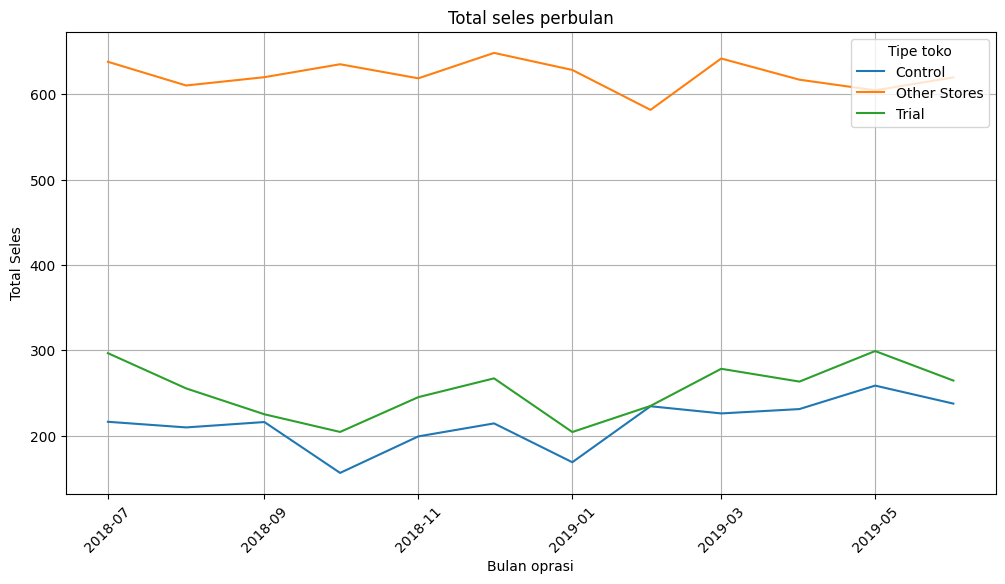

In [18]:
# Mengurutkan korelasi pada variabel corr_nSales
sorted_corr = corr_nSales.sort_values(by='correlation', ascending=False)
control_corr_store = sorted_corr[sorted_corr['STORE_NBR']!= 77].iloc[0]['STORE_NBR']
print(f"Toko kontrol adalah {control_store}")

# membuat kolom untuk tipe toko
measure_over_time['store_type'] = measure_over_time['STORE_NBR'].apply(lambda x: 'Trial' if x == 77 else ('Control' if x == control_corr_store else 'Other Stores'))

# Menghitung rata rata total sales berdasarkan tipe toko dan tahun-bulan
sales_by_month = measure_over_time.groupby(['YearMonth', 'store_type'])['total_seles'].mean().reset_index()

# Mengconversi YearMonth ke dalam kolom datetim
sales_by_month['TransactionMonth'] = pd.to_datetime(sales_by_month['YearMonth'].astype(str), format='%Y-%m')

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='TransactionMonth', y='total_seles', hue='store_type')
plt.xlabel('Bulan oprasi')
plt.ylabel('Total Seles')
plt.title('Total seles perbulan')
plt.legend(title='Tipe toko', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* **tren penjulan perbulan**
- pada type toko control : trendnya stabil sekitar 100 - 200, terjadi peningkatan di akhir priode akan tetapi mengalami penuranan kemabli\.
- pada type other store : trend yang memiliki penjualan tertinggi, jika di bandingkan dengan control dan trail, terdapat fluktuasi yang signifikan, puncaknya penjualan tertinggi di sekitr 650.
- pada type Trail: trendnya tampak seperti other store tetapi dalam skala kecil, terjadi kenaikan penjualan pada akhir priode.

* **Kesimpulan** :\
Bedasarkan grafik di atas yang memiliki penjualan tertinggi setiap bulannya yaitu other store, sedangkan yang memiliki potensi yang baik diakhir priode. akan tetapi perlu dicari dan di analisis lebih dalam lagi mengenai faktor penyebab fluktuasi.



# Skala Penjualan Toko Control ke tingkat toko percobaan

<ipython-input-19-8a6d6f40035e>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['t_value'] = trial_data['percentage_diff'] / (std_dev / np.sqrt(degrees_of_freedom))
<ipython-input-19-8a6d6f40035e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['siginificant'] = trial_data['t_value'].abs() > t_kritis


   YearMonth  trial_sales  control_sales  percentage_diff   t_value  \
7    2019-02        225.4     171.319327        31.567176  4.616222   
8    2019-03        192.9     236.086389       -18.292621 -2.675019   
9    2019-04        192.9     241.493886       -20.122201 -2.942567   
10   2019-05        221.4     236.823775        -6.512765 -0.952393   
11   2019-06        174.1     192.457723        -9.538574 -1.394872   

    siginificant  
7           True  
8           True  
9           True  
10         False  
11         False  


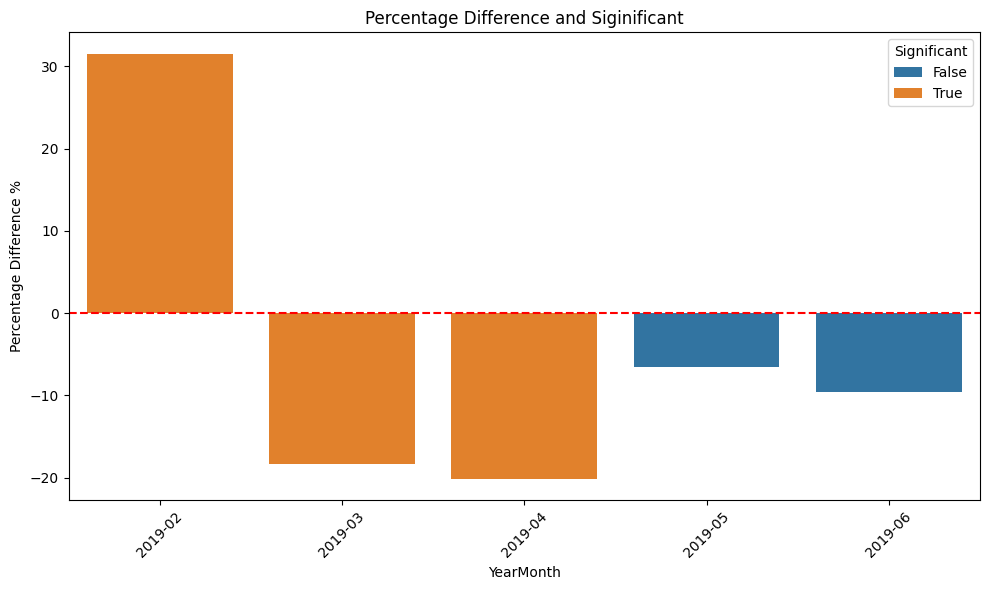

In [19]:
# Toko percobaan dan Control
trial_store = 1
control_store = 2

# Hitung faktor skala
trial_sales_sum = measure_over_time[(measure_over_time['STORE_NBR'] == trial_store) & (measure_over_time['YearMonth'] < '2019-02')]['total_seles'].sum()
control_sales_sum = measure_over_time[(measure_over_time['STORE_NBR'] == control_store) & (measure_over_time['YearMonth'] < '2019-02')]['total_seles'].sum()

scaling_factor_for_control_sales = trial_sales_sum / control_sales_sum

# Terapkan faktor skala pada penjualan kontrol
measure_over_time['control_sales'] = measure_over_time.apply(lambda row: row['total_seles'] * scaling_factor_for_control_sales if row['STORE_NBR'] == control_store else row['total_seles'], axis=1)

# Menghitung Perbedaan persentase
# Mengabungkan data trial dan control
filtered_data = measure_over_time[measure_over_time['STORE_NBR'].isin([trial_store, control_store])]
merged_data = filtered_data.pivot_table(index='YearMonth', columns='STORE_NBR', values='control_sales', aggfunc='sum', fill_value=0).reset_index()
merged_data.columns = ['YearMonth', 'trial_sales', 'control_sales']
merged_data['percentage_diff'] = ((merged_data['trial_sales'] - merged_data['control_sales']) / merged_data['control_sales']) * 100


# Hitung standar deviasinya
# std selama periode percobaan
pre_trial_data = merged_data[merged_data['YearMonth'] < '201902']
std_dev = merged_data['percentage_diff'].std()

# derajat kebebasan
degrees_of_freedom = len(pre_trial_data) - 1

# Menghitung nilai t untuk bulan percobaan
# data percobaan
trial_data = merged_data[merged_data['YearMonth'] >= '2019-02']
trial_data['t_value'] = trial_data['percentage_diff'] / (std_dev / np.sqrt(degrees_of_freedom))

# nilai t kritis
t_kritis = t.ppf(0.975, degrees_of_freedom) # 95% interval kepercayaan
trial_data['siginificant'] = trial_data['t_value'].abs() > t_kritis
print(trial_data)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=trial_data, x='YearMonth', y='percentage_diff', hue='siginificant')
plt.axhline(0, color='red', linestyle='--')
plt.title('Percentage Difference and Siginificant')
plt.ylabel('Percentage Difference %')
plt.xlabel('YearMonth')
plt.legend(title='Significant')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
merged_data

,YearMonth,trial_sales,control_sales,percentage_diff
0,2018-07,206.9,185.329659,11.638904
1,2018-08,176.1,238.175649,-26.062970
2,2018-09,278.8,189.753974,46.927094
3,2018-10,188.1,206.222260,-8.787732
4,2018-11,192.6,200.200275,-3.796336
5,2018-12,189.6,167.140806,13.437289
6,2019-01,154.8,200.077377,-22.629933
7,2019-02,225.4,171.319327,31.567176
8,2019-03,192.9,236.086389,-18.292621
9,2019-04,192.9,241.493886,-20.122201


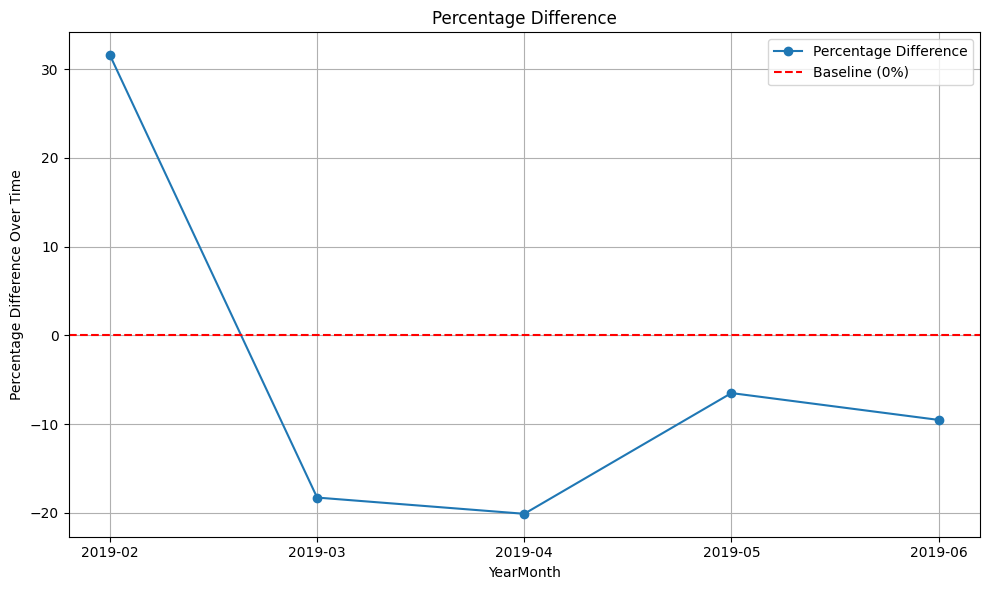

In [21]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(trial_data['YearMonth'], trial_data['percentage_diff'], marker='o', label='Percentage Difference')
plt.axhline(0, color='red', linestyle='--', label='Baseline (0%)')
plt.title('Percentage Difference')
plt.ylabel('Percentage Difference Over Time')
plt.xlabel('YearMonth')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Interpertasi**:\
berdasarkan visualisasi di atas trend cenderung fluktuatif, terjadi penurunan yang signifikan pada bulan maret, yang mengindikasikan bahwa ada sebuah peristiwa yang mempengaruhi penurunan tersebut.

# Time Series Analisi (Distribusi Penjualan dan Perbandingan antara eksperimen type toko control dan toko Trial)

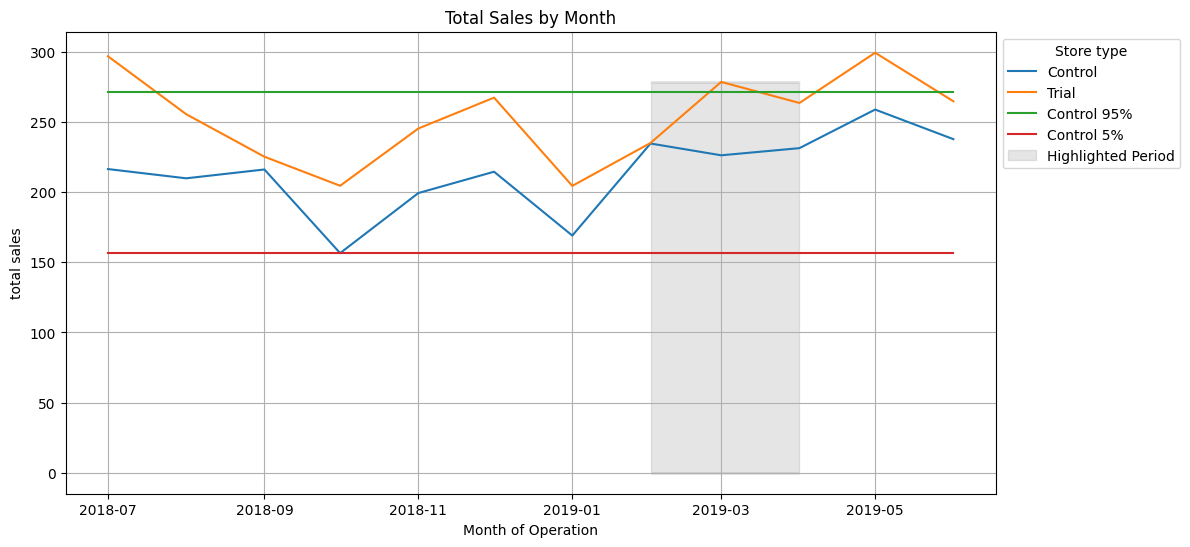

In [22]:
measure_over_time_sales = measure_over_time.copy()

# Menambahkan kolom baru
measure_over_time_sales['transaction_month'] = pd.to_datetime(measure_over_time['YearMonth'].astype(str), format='%Y-%m')

# Filter untuk trial dan control store
past_sales = measure_over_time_sales[measure_over_time_sales['store_type'].isin(['Trial', 'Control'])]

# Menghitung 95 dan 5 percentile untuk control store
std_dev = past_sales[past_sales['store_type'] == 'Control']['total_seles'].std()
mean_sales = past_sales[past_sales['store_type'] == 'Control']['total_seles'].mean()

past_sales_control_95 = past_sales[past_sales['store_type'] == 'Control'].copy()
past_sales_control_95['total_seles'] = mean_sales + std_dev * 2
past_sales_control_95['store_type'] = 'Control 95th % confidenc interval'

past_sales_control_5 = past_sales[past_sales['store_type'] == 'Control'].copy()
past_sales_control_5['total_seles'] = mean_sales - std_dev * 2
past_sales_control_5['store_type'] = 'Control 5th % confidenc interval'

# Gabungkan kedua data
trial_assessment = pd.concat([past_sales, past_sales_control_95, past_sales_control_5])

# Ubah nama category store_type
trial_assessment['store_type'] = trial_assessment['store_type'].replace({'Control 95th % confidenc interval':'Control 95%', 'Control 5th % confidenc interval':'Control 5%'})

# visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=trial_assessment, x='transaction_month', y='total_seles', hue='store_type')

highlight_months = (trial_assessment['transaction_month'] > '2019-01') & (trial_assessment['transaction_month'] < '2019-05')
highlight_data = trial_assessment[highlight_months]
plt.fill_between(x=highlight_data['transaction_month'], y1=0, y2=highlight_data['total_seles'].max(), color='gray', alpha=0.2, label='Highlighted Period')

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('total sales')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Store type')
plt.grid(True)
plt.show()

**Interpetasi**:\
untuk trend umum kedua toko terjadi fluktuasi dan tidak ada keanaikan yang siginifikan dari bulan ke bulan.\
sedangkan dari segi penjualan toko trial, lebih unggul jika dilihat pada grafik, akan tetapi toko control mengalami perubahan yang signifikan pada sekitaran garis highlighted periode.\
untuk penjualan pada toko control itu yakin 95% tidak akan melewati garis merah dan hijau.



In [23]:
measure_over_time_sales.head()

,STORE_NBR,YearMonth,total_seles,jumlah_cust,jumlah_transaksi,jumlah_produk,rerata_harga_units,magitude_distance,store_type,control_sales,transaction_month
0,1,2018-07,206.9,49,1.061224,62,3.337097,4.25,Other Stores,206.9,2018-07-01
1,1,2018-08,176.1,42,1.023810,54,3.261111,2.75,Other Stores,176.1,2018-08-01
2,1,2018-09,278.8,59,1.050847,75,3.717333,14.25,Other Stores,278.8,2018-09-01
3,1,2018-10,188.1,44,1.022727,58,3.243103,0.75,Other Stores,188.1,2018-10-01
4,1,2018-11,192.6,46,1.021739,57,3.378947,1.25,Other Stores,192.6,2018-11-01


In [24]:
measure_over_time.head()

,STORE_NBR,YearMonth,total_seles,jumlah_cust,jumlah_transaksi,jumlah_produk,rerata_harga_units,magitude_distance,store_type,control_sales
0,1,2018-07,206.9,49,1.061224,62,3.337097,4.25,Other Stores,206.9
1,1,2018-08,176.1,42,1.023810,54,3.261111,2.75,Other Stores,176.1
2,1,2018-09,278.8,59,1.050847,75,3.717333,14.25,Other Stores,278.8
3,1,2018-10,188.1,44,1.022727,58,3.243103,0.75,Other Stores,188.1
4,1,2018-11,192.6,46,1.021739,57,3.378947,1.25,Other Stores,192.6


# Menghitung Scaling factor untuk jumlah pelanggan

In [25]:
# Menghitung scaling factor
scaling_factor_for_control_cust = (measure_over_time[measure_over_time['store_type'] == 'Trial']['jumlah_transaksi'].sum()/
                                  measure_over_time[measure_over_time['store_type'] == 'Control']['jumlah_transaksi'].sum())

# Skla jumlah pelanggan control
measure_over_time['scaled_control_customers'] = np.where(measure_over_time['store_type'] == 'Control',
                                                         measure_over_time['jumlah_transaksi'] * scaling_factor_for_control_cust, np.nan)

# Isi nilai 'scaled_contro_customers' untuk 'Trial' dengan menggunakan mapping dari control
control_mapping = measure_over_time[measure_over_time['store_type'] == 'Control'].set_index('YearMonth')['scaled_control_customers'].to_dict()

measure_over_time['scaled_control_customers'] = measure_over_time.apply(lambda row: control_mapping.get(row['YearMonth'], np.nan) if row['store_type'] == 'Trial' else row['scaled_control_customers'], axis=1)

# Membuat kolom precentage diff
measure_over_time['percentage_diff'] = np.where(measure_over_time['store_type'] == 'Trial',
                                                (measure_over_time['jumlah_transaksi'] - measure_over_time['scaled_control_customers']) / measure_over_time['scaled_control_customers'] * 100,
                                                np.nan)

# Menggitung Standar Deviasi dan menyiapkan data untuk visualisasi

In [26]:
# Hitung std
pre_trial_data = measure_over_time[measure_over_time['YearMonth'] < '2019-02']
std_dev_cust = pre_trial_data['percentage_diff'].std()
degress_of_freedom_2 = len(pre_trial_data) - 1

# Menghitung drajat kepercayaan 5% dan 95%

In [27]:
# hitung rata-rata pelanggan per bulan dan tipe toko
past_customers = pre_trial_data.groupby(['YearMonth', 'store_type'])['jumlah_transaksi'].mean().reset_index()

# Tambahkan persentase drajat kepercayaan
past_customers_95 = past_customers[past_customers['store_type'] == 'Control'].copy()
past_customers_95['jumlah_transaksi'] *= (1 + std_dev_cust * 2)

past_customers_5 = past_customers[past_customers['store_type'] == 'Control'].copy()
past_customers_5['jumlah_transaksi'] *= (1 - std_dev_cust * 2)

In [28]:
past_customers

,YearMonth,store_type,jumlah_transaksi
0,2018-07,Control,1.020408
1,2018-07,Other Stores,1.152715
2,2018-07,Trial,1.078431
3,2018-08,Control,1.046512
4,2018-08,Other Stores,1.151145
5,2018-08,Trial,1.021277
6,2018-09,Control,1.045455
7,2018-09,Other Stores,1.151535
8,2018-09,Trial,1.047619
9,2018-10,Control,1.117647


# Visualisasi

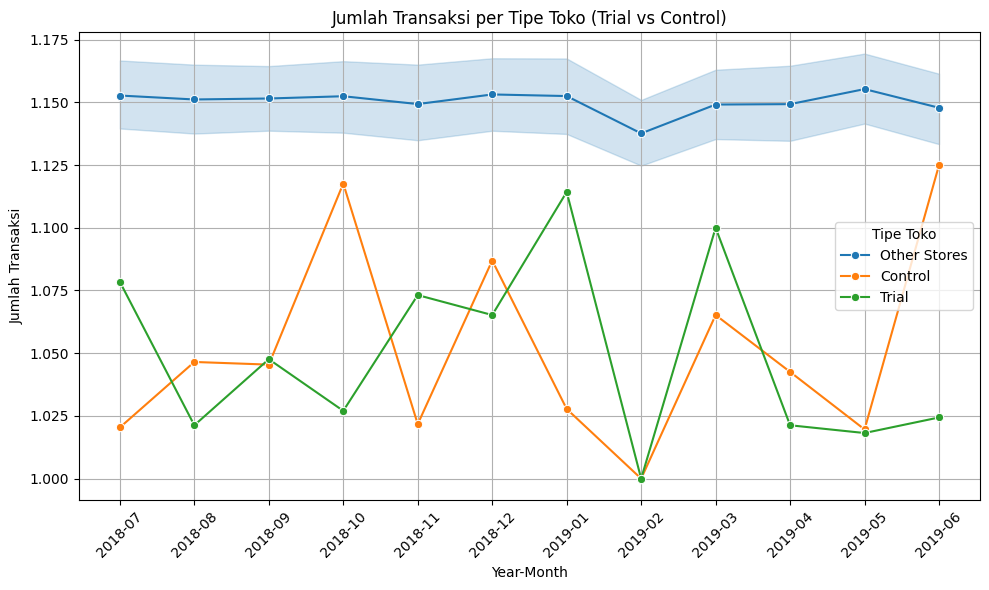

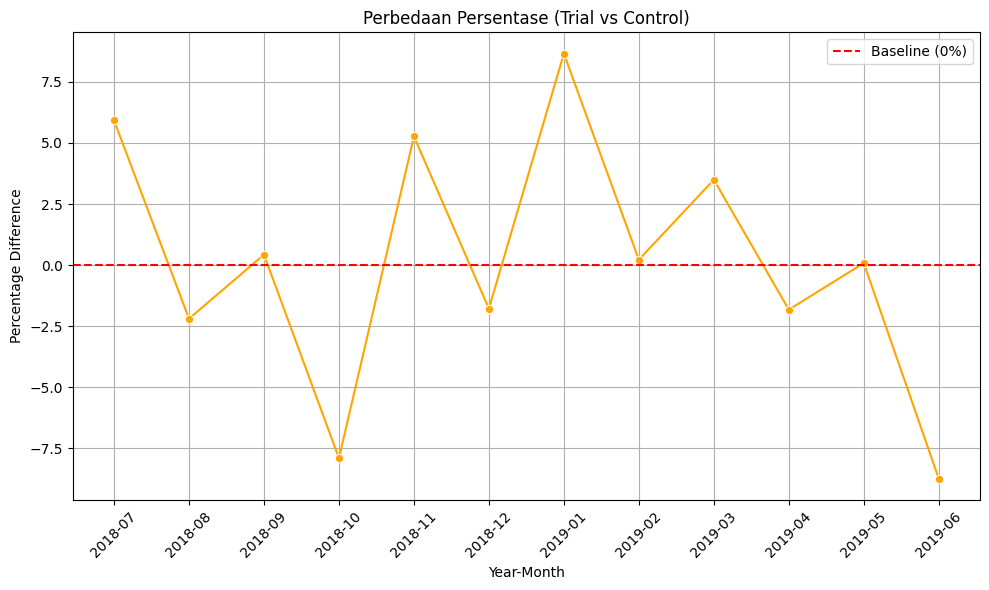

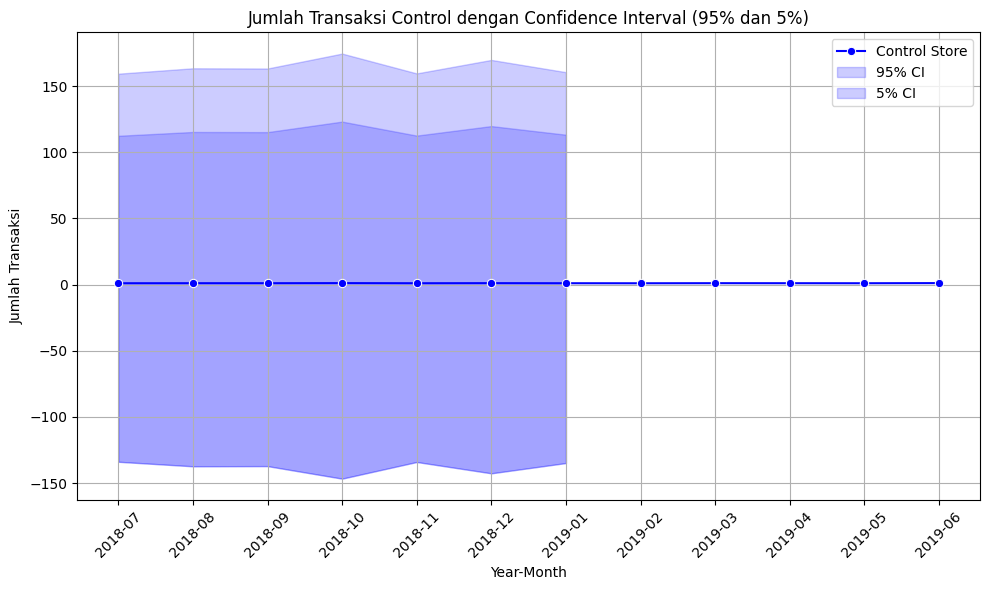

In [29]:
# Visualisasi Jumlah Transaksi per Tipe Toko (Trial vs Control)
plt.figure(figsize=(10, 6))
# Plot untuk jumlah transaksi per tipe toko (Trial dan Control)
sns.lineplot(data=measure_over_time, x='YearMonth', y='jumlah_transaksi', hue='store_type', marker='o', linestyle='-')
plt.title('Jumlah Transaksi per Tipe Toko (Trial vs Control)')
plt.xlabel('Year-Month')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Tipe Toko')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi Percentage Diff per Tipe Toko
plt.figure(figsize=(10, 6))
# Plot untuk perbedaan persentase untuk Trial Store
sns.lineplot(data=measure_over_time[measure_over_time['store_type'] == 'Trial'], x='YearMonth', y='percentage_diff', marker='o', color='orange')
# Menambahkan garis horizontal 0% (perbedaan dasar)
plt.axhline(0, color='red', linestyle='--', label='Baseline (0%)')  # Garis dasar untuk perbedaan 0%
plt.title('Perbedaan Persentase (Trial vs Control)')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Difference')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi Confidence Interval (Control Store dengan 95% dan 5% CI)
plt.figure(figsize=(10, 6))

# Plot untuk Control Store
sns.lineplot(data=measure_over_time[measure_over_time['store_type'] == 'Control'], x='YearMonth', y='jumlah_transaksi', color='blue', marker='o')

# Confidence Interval 95% (plus)
plt.fill_between(past_customers_95['YearMonth'],
                 past_customers_95['jumlah_transaksi'] * (1 - std_dev_cust * 2),
                 past_customers_95['jumlah_transaksi'] * (1 + std_dev_cust * 2),
                 color='blue', alpha=0.2)
# Confidence Interval 5% (minus)
plt.fill_between(past_customers_5['YearMonth'],
                 past_customers_5['jumlah_transaksi'] * (1 - std_dev_cust * 2),
                 past_customers_5['jumlah_transaksi'] * (1 + std_dev_cust * 2),
                 color='blue', alpha=0.2)

# Menambahkan label dan judul
plt.title('Jumlah Transaksi Control dengan Confidence Interval (95% dan 5%)')
plt.xlabel('Year-Month')
plt.ylabel('Jumlah Transaksi')
plt.legend(['Control Store', '95% CI', '5% CI'])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

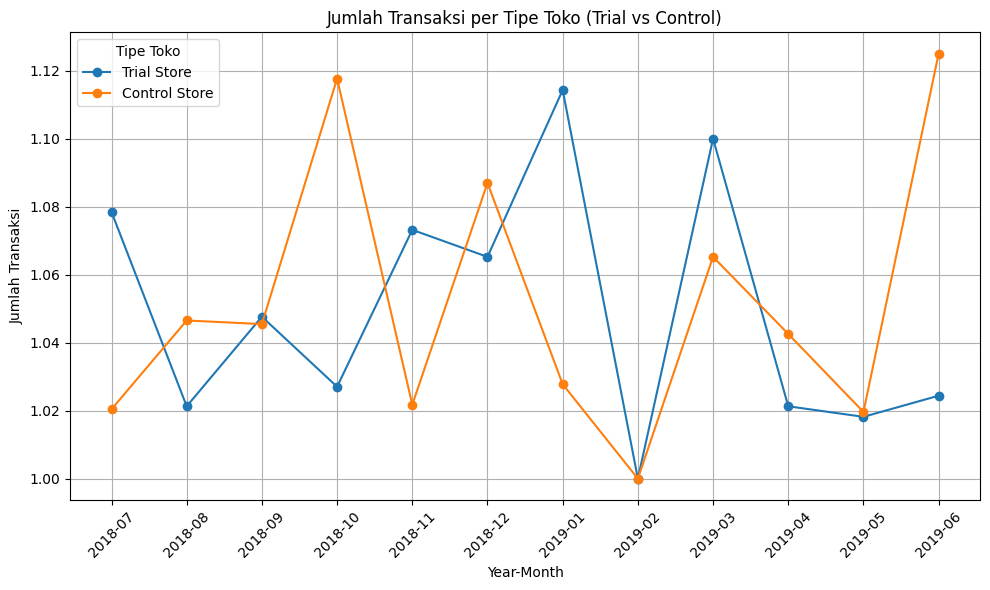

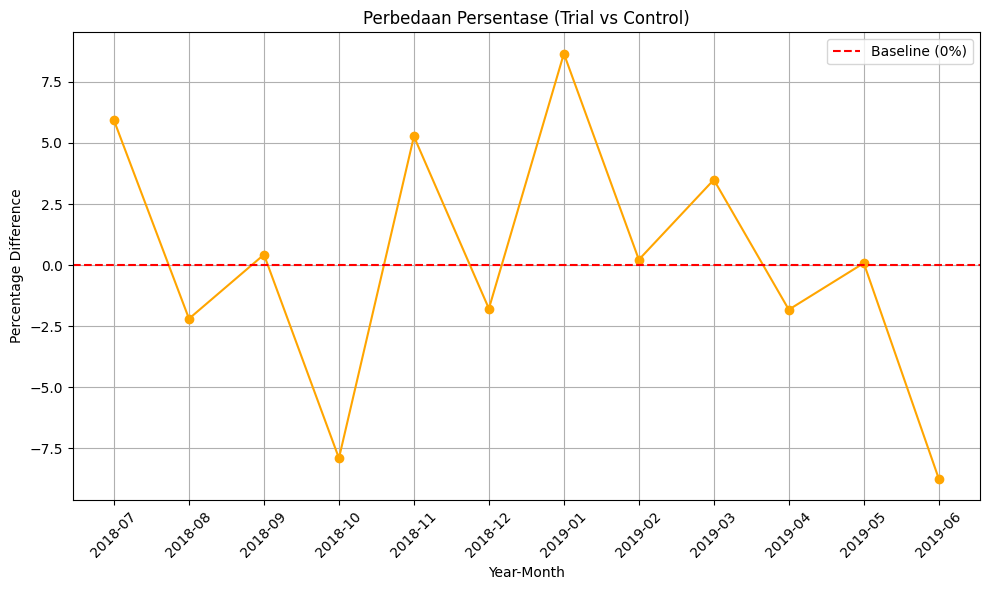

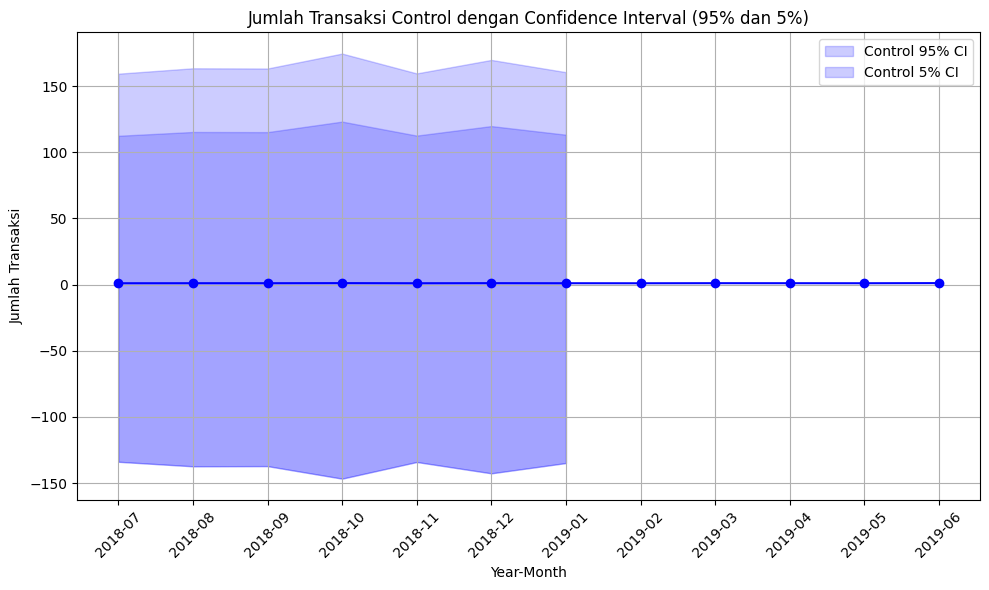

In [30]:
# Visualisasi Jumlah Transaksi per Tipe Toko (Trial vs Control)
plt.figure(figsize=(10, 6))
# Plot untuk Trial dan Control Stores
for store_type in ['Trial', 'Control']:
    store_data = measure_over_time[measure_over_time['store_type'] == store_type]
    plt.plot(store_data['YearMonth'], store_data['jumlah_transaksi'], marker='o', label=f'{store_type} Store')

plt.title('Jumlah Transaksi per Tipe Toko (Trial vs Control)')
plt.xlabel('Year-Month')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Tipe Toko')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi Perbedaan Persentase (Trial)
plt.figure(figsize=(10, 6))
trial_data = measure_over_time[measure_over_time['store_type'] == 'Trial']
plt.plot(trial_data['YearMonth'], trial_data['percentage_diff'], marker='o', color='orange')
plt.axhline(0, color='red', linestyle='--', label='Baseline (0%)')

plt.title('Perbedaan Persentase (Trial vs Control)')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Difference')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi Confidence Interval untuk Control Store
plt.figure(figsize=(10, 6))

# Plot untuk Control Store
control_data = measure_over_time[measure_over_time['store_type'] == 'Control']
plt.plot(control_data['YearMonth'], control_data['jumlah_transaksi'], marker='o', color='blue')

# Confidence Interval 95% dan 5%
plt.fill_between(past_customers_95['YearMonth'],
                 past_customers_95['jumlah_transaksi'] * (1 - std_dev_cust * 2),
                 past_customers_95['jumlah_transaksi'] * (1 + std_dev_cust * 2),
                 color='blue', alpha=0.2, label='Control 95% CI')

plt.fill_between(past_customers_5['YearMonth'],
                 past_customers_5['jumlah_transaksi'] * (1 - std_dev_cust * 2),
                 past_customers_5['jumlah_transaksi'] * (1 + std_dev_cust * 2),
                 color='blue', alpha=0.2, label='Control 5% CI')

plt.title('Jumlah Transaksi Control dengan Confidence Interval (95% dan 5%)')
plt.xlabel('Year-Month')
plt.ylabel('Jumlah Transaksi')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Membuat kolom confidect interval 5%

In [31]:
# menambahkan kolom std (5%) dari jumlah transaksi
past_customers['std'] = past_customers['jumlah_transaksi'] * 0.05

In [32]:
# Membuat filter control 5 %
past_control_customers_5 = past_customers[past_customers['store_type'] == 'Control'].copy()

# Menghitung ulang jumlah_transaksi untuk percentile
past_control_customers_5['jumlah_transaksi'] = past_control_customers_5['jumlah_transaksi'] * (1 - past_control_customers_5['std'] * 2)

# ubah type store
past_control_customers_5['store_type'] = 'Control 5%'

# Menggabungkan dataframe
trial_assessment_cust = pd.concat([past_customers, past_control_customers_5], ignore_index=True)

# Menampilkan hasil
print(trial_assessment_cust)

   YearMonth    store_type  jumlah_transaksi       std
0    2018-07       Control          1.020408  0.051020
1    2018-07  Other Stores          1.152715  0.057636
2    2018-07         Trial          1.078431  0.053922
3    2018-08       Control          1.046512  0.052326
4    2018-08  Other Stores          1.151145  0.057557
5    2018-08         Trial          1.021277  0.051064
6    2018-09       Control          1.045455  0.052273
7    2018-09  Other Stores          1.151535  0.057577
8    2018-09         Trial          1.047619  0.052381
9    2018-10       Control          1.117647  0.055882
10   2018-10  Other Stores          1.152437  0.057622
11   2018-10         Trial          1.027027  0.051351
12   2018-11       Control          1.021739  0.051087
13   2018-11  Other Stores          1.149318  0.057466
14   2018-11         Trial          1.073171  0.053659
15   2018-12       Control          1.086957  0.054348
16   2018-12  Other Stores          1.153147  0.057657
17   2018-

In [33]:
trial_assessment_cust['YearMonth'] = pd.to_datetime(trial_assessment_cust['YearMonth'], format='%Y-%M')
trial_assessment_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YearMonth         28 non-null     datetime64[ns]
 1   store_type        28 non-null     object        
 2   jumlah_transaksi  28 non-null     float64       
 3   std               28 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.0+ KB


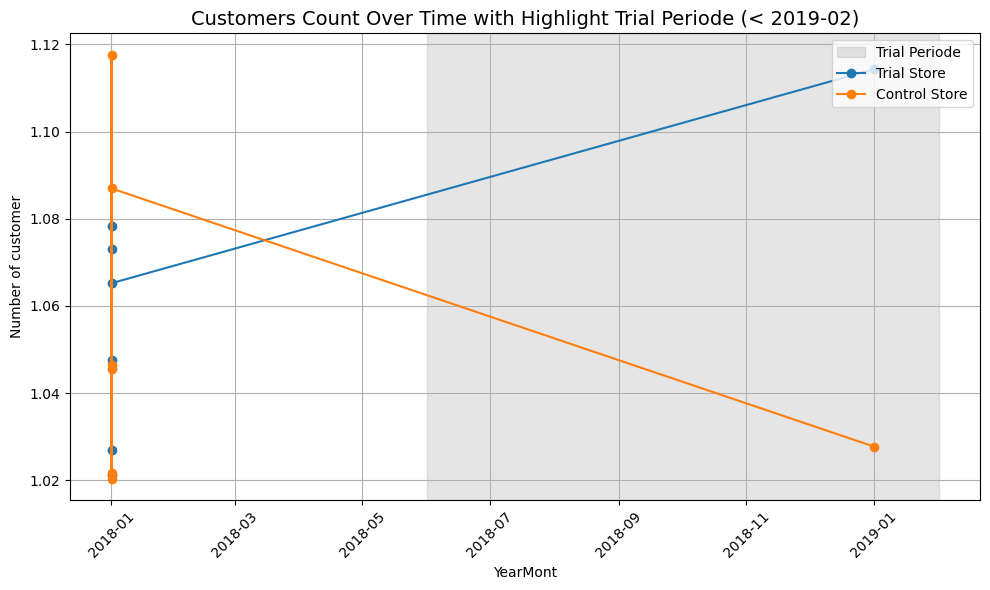

In [34]:
# Visualisasi

# Periode trial
start_trial = "2018-06"
end_trial = "2019-02"

# Filter data untuk trial data
pre_trial_data_cust = trial_assessment_cust[(trial_assessment_cust['YearMonth'] >= start_trial) & (trial_assessment_cust['YearMonth'] <= end_trial)]

# Plotting
plt.figure(figsize=(10, 6))

# Highlight trial periode
plt.axvspan(pd.to_datetime(start_trial), pd.to_datetime(end_trial), color='gray', alpha=0.2, label='Trial Periode')

# line plot
for store_type in['Trial', 'Control']:
    store_data = trial_assessment_cust[trial_assessment_cust['store_type'] == store_type]
    plt.plot(store_data['YearMonth'], store_data['jumlah_transaksi'], marker='o', label=f'{store_type} Store')


plt.title('Customers Count Over Time with Highlight Trial Periode (< 2019-02)', fontsize=14)
plt.xlabel('YearMont')
plt.ylabel('Number of customer')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**interpertasi hasil visualisasi** \
pada visulisasi di atas merupkan perbandingan antar jumlah pelanggan di toko trial (blue) dan toko control (orange):
- untuk perbandingan penjualan : baik dari toko control dan toko trial sama-sama memiliki jumlah pelanggan yang cukup signifikan.
- untuk kinerja, pada toko train lebih fluktuatif jika di bandingkan dengan toko control, karena terdapat beberapa titik dimana jumlah pelanggan melampaui toko control.
- Perbandingan dengan toko control: secara umum, jumlah pelanggan toko uji lebih tinggi daripada toko control, terlihat pada akhir periode uji coba.
Namum perlu analisis lebih dalam untuk bisa di jadikan sebagai acuan pengambilan keputusan.

# Percobaan ketiga

In [68]:
corr_weight = 0.5
score_nsales = pd.merge(corr_nSales, mag_nSales, on='STORE_NBR')
score_ncustomer = pd.merge(corr_Ncust, mag_Ncust, on='STORE_NBR')

# Mengabungkan skor dari faktor pendorong rata-rata sederhana
score_control = pd.merge(score_nsales, score_ncustomer, on='STORE_NBR')
score_control['finalControlScore'] = score_control.mean(axis=1)

# # pilih toko control berdasarkan nilai tertinggi dari kedua
trial_store = 86
control_store = score_control.loc[score_control['finalControlScore'].idxmax(), 'STORE_NBR']
print(f"{control_store} toko, akan menjadi percobaan toko kontrol {trial_store}")

226 toko, akan menjadi percobaan toko kontrol 86


In [49]:
score_nsales

,STORE_NBR,correlation,magitude_distance
0,1,0.064391,46.433333
1,1,0.064391,77.233333
2,1,0.064391,25.466667
3,1,0.064391,65.233333
4,1,0.064391,60.733333
...,...,...,...
3093,272,-0.089618,142.166667
3094,272,-0.089618,188.966667
3095,272,-0.089618,191.766667
3096,272,-0.089618,61.266667


In [52]:
score_ncustomer

,STORE_NBR,correlation,magitude_distance
0,1,0.243356,4.25
1,1,0.243356,2.75
2,1,0.243356,14.25
3,1,0.243356,0.75
4,1,0.243356,1.25
...,...,...,...
2472,272,0.097637,1.25
2473,272,0.097637,0.25
2474,272,0.097637,5.25
2475,272,0.097637,9.25


In [62]:
score_control

,STORE_NBR,correlation_x,magitude_distance_x,correlation_y,magitude_distance_y,finalControlScore
0,1,0.064391,46.433333,0.243356,4.25,10.398216
1,1,0.064391,46.433333,0.243356,2.75,10.098216
2,1,0.064391,46.433333,0.243356,14.25,12.398216
3,1,0.064391,46.433333,0.243356,0.75,9.698216
4,1,0.064391,46.433333,0.243356,1.25,9.798216
...,...,...,...,...,...,...
29634,272,-0.089618,58.766667,0.097637,1.25,66.404937
29635,272,-0.089618,58.766667,0.097637,0.25,66.204937
29636,272,-0.089618,58.766667,0.097637,5.25,67.204937
29637,272,-0.089618,58.766667,0.097637,9.25,68.004937


In [63]:
control_store

226

In [ ]:
# Menggabungkan score driver menggunakan rata-rata sederhana
score_control['fi']